# ML stands for Machine Lumberjacks

What is the best way to make a decision?

Is it to trust gut instinct? Follow a process of elimination? Or work out the likilihood of something happening, and choosing the most likely?

Humans tend to employ a mix of processes, but machine learning models can only follow one (not gut instinct though... they don't have intestines). 

When looking at classification models in the last module we used Logistic Regression, a model which assigns labels based on probability. If the model thinks there is a 60% chance of a student passing a test, it will predict pass.

But that isn't the only method. Logistic Regression is an example of a <i>parametric</i> model, which means it requires parameters do be set before they can be used to make predictions, such as the assumption of an underlying probability distribution. Decisions trees on the other hand are <i>non-parametric</i> which means they can be used without any prior assumptions. This means they can produce more accurate results and predictions when the data is not normally distributed, or has any other unusual features. 

## Decision Trees

You may have come across a decision tree before when you have been planning a project. Take the example below, you have some data to upload into a software but it may require cleaning. If it does require cleaning, an extra step is applied where the data is sroted before being added to the dashboard:

<img src='decision tree.PNG' alt='example of a decision tree in project management'>

It is through this same process a decision tree model will classify data. Each feature provided to the model is a node, with each branch being a decision that has been made. The leaves at the end of each branch are the outcomes, which could be new nodes themselves. 

The top of the tree is called the root node, and from there the model divides the data up based on attributes found within the features (for example, separating data by size, color, shape, etc). At each node the process is repeated until there are no more ways to divide up the data. 

Using this process, every new piece of data provided will flow through the decision tree until it reaches an endpoint, which is what label should be assigned to it. 

For example, consider the numbers from 1 to 6. We could make a tree that divides the numbers as follows:

<img src='onetosixe1.PNG' alt='a division of one to six'>

Let's consider a real world example. Troy is a manager in the HR team at a company and is looking to create a method to decide if an employee should receive a promotion. The model will return either yes (for promotion) or no, based on some features. The decision tree might look something like this:

<img src='promotions.PNG' alt='decision tree to approve a promotion'>

This process is exactly how a decision tree machine learning model works, at each node (decision based on attributes within the features) it will divide the data logically. It will keep doing this until there are no more splits to be made. When you want to predict then what happens with new data, the tree will apply the process in the same way.

But how does the decision tree decide which attributes to base its decision on?

## Making a decision

At each point in the decision tree, the model has to decide on what basis it is splitting the data. The two main methods used are <b> Information Gain</b> and <b>Gini Index</b>. There are other methods, but these are the two we will focus on here.

### Information Gain

In this method, for all the possible ways the data can be split, the model checks how much clearer it will make the next step in the decision tree process. 

For example, if a possible split doesn't divide the data in a meaningful way, such that the next decision is not easier to make, then not much 'information' is gained from it. 

On the other hand, if a possible split is able to divide the data up such that the next decision is easier to make, then there is a lot of 'information' gained from it. 

The model will calculate an 'information gain' score for each possible split, which describes how much easier it will make the next decision. The split with the highest score is the one chosen.

### Gini Index

In this method, for all the possible ways the data can be split, the model assigns a score based on the probability a data point is classified incorrectly when selected randomly. The split then that returns the lowest score is selected.

So how do we use Decision Trees as a predictive model? 

Let's do an example:

## Iris spy

For this demonstration, we will be using Sci-kit learns Iris (as in the flower) dataset. Within this data there is petal and sepal information relating to three different species. This is a classic dataset for teaching classification as it often returns good models and is easy to explain.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets



In [2]:
# Load in data and convert to dataframe

iris = datasets.load_iris()
iris_df=pd.DataFrame(iris.data,columns=iris.feature_names)
iris_df['species']=iris.target
iris_df['species_name']=iris_df.species.map({0:'setosa',1:'versicolor',2:'virginica'})
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,species_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


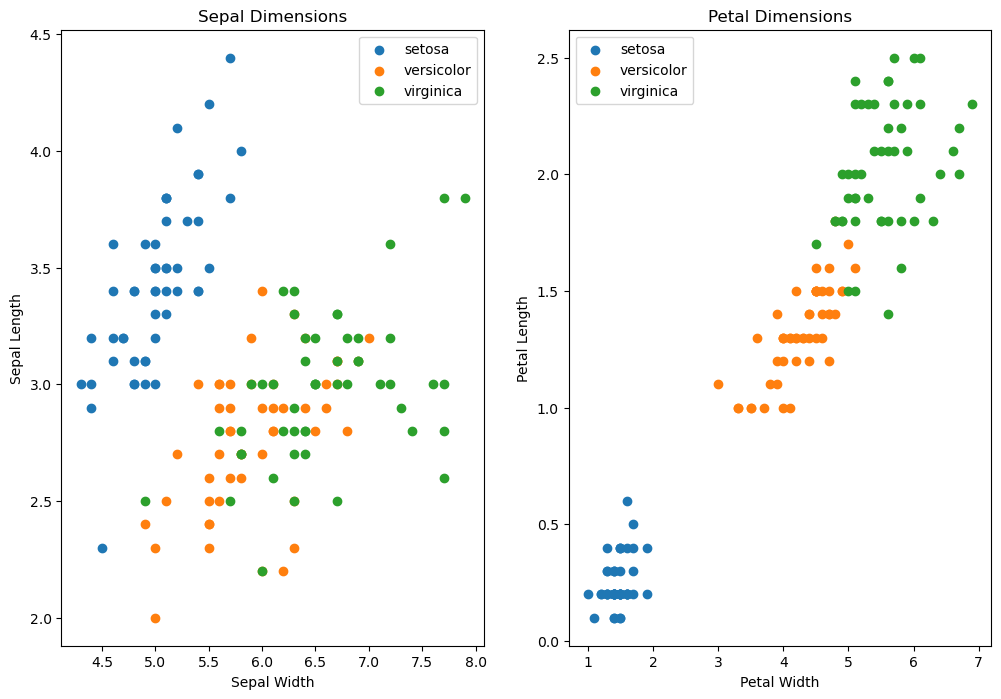

In [3]:
fig, ax = plt.subplots(ncols=2,figsize=(12,8))

for species in iris.target_names:
    sub_df=iris_df[iris_df.species_name==species]
    ax[0].scatter(sub_df['sepal length (cm)'], sub_df['sepal width (cm)'],label=species)
    ax[1].scatter(sub_df['petal length (cm)'], sub_df['petal width (cm)'],label=species)
    
ax[0].set_ylabel('Sepal Length')
ax[0].set_xlabel('Sepal Width')
ax[0].set_title('Sepal Dimensions')
ax[0].legend()
ax[1].set_ylabel('Petal Length')
ax[1].set_xlabel('Petal Width')
ax[1].set_title('Petal Dimensions')
ax[1].legend()
plt.show()

Taking a quick peek at the data visually, we can see there is a clear divide between the three different species when it comes to the petal dimensions. We should expect then that our model should be able to at leats identify the setosa very easily. 

With Logistic Regression models, you could only have a binary outcome (e.g. True/False), but with Decision Trees you can have as many as you would like (another advantage of Decision Trees over Logistic Regression).

Building a model follows the same process as before:

In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

X=iris_df.drop(['species','species_name'],axis=1)
y=iris_df.species_name
X_train, X_test, y_train, y_test = train_test_split(X,y, stratify=y, train_size=0.8)

In [5]:
dec_tree=DecisionTreeClassifier()
dec_tree.fit(X_train,y_train)

DecisionTreeClassifier()

And there is our model! 

But how accurate is it? We can check it using the same methods as with other classification models:

In [6]:
print('Train score: '+str(dec_tree.score(X_train,y_train)))
print('Test score: '+str(dec_tree.score(X_test,y_test)))
print('Baseline: '+str(iris_df.species_name.value_counts(normalize=True).max()))

Train score: 1.0
Test score: 0.9333333333333333
Baseline: 0.3333333333333333


In [23]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

y_true=iris_df.species_name
y_pred= dec_tree.predict(X)

In [24]:
print(classification_report(y_true,y_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        50
  versicolor       0.98      0.98      0.98        50
   virginica       0.98      0.98      0.98        50

    accuracy                           0.99       150
   macro avg       0.99      0.99      0.99       150
weighted avg       0.99      0.99      0.99       150



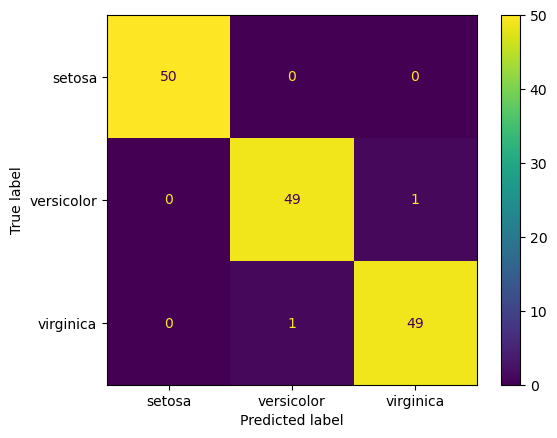

In [27]:
ConfusionMatrixDisplay.from_estimator(dec_tree, X, y_true)

As hinted at earlier, this dataset is easy to build good models in due to the observable pattern within the data. We should not expect any of our models to be anywhere near as good, although this one is <i>slightly</i> overfitting. 

With decision trees, there is another visualization you can build. You can plot the decision tree itself to see how the computer made its decisions:

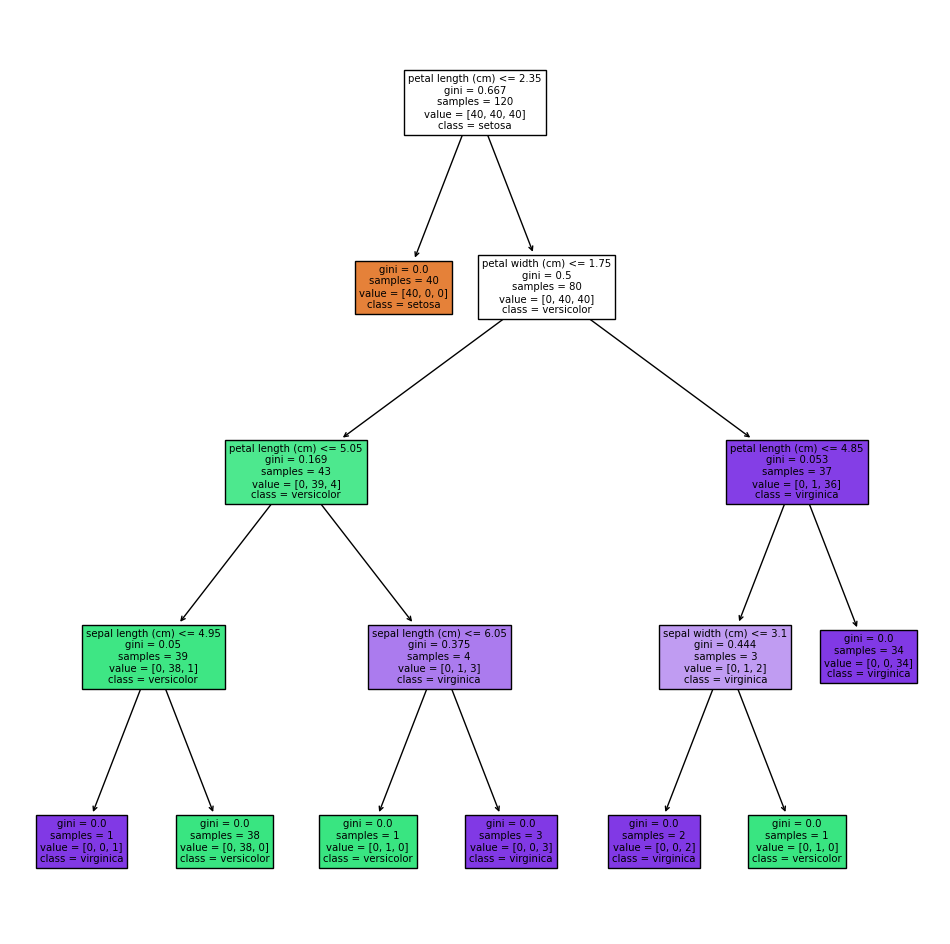

In [28]:
from sklearn.tree import plot_tree

fig, ax= plt.subplots(figsize=(12,12))
plot_tree(dec_tree,feature_names=X.columns,class_names=iris_df.species_name.unique(),filled=True,ax=ax)
plt.show()

This is a relatively small tree, so we can see which features the model is prioritizing when making its decisions. In larger trees this will not be possible, so we can use the `feature_importances_` attribute to get a clearer idea.

The function returns the feature importances for each passed through, in the order they are passed through. To make it more accessible we can make a dataframe or visualization to show the information:

In [29]:
feature_importances=pd.DataFrame({'Feature':X.columns,'Feature Importance':dec_tree.feature_importances_})
display(feature_importances)

,Feature,Feature Importance
0,sepal length (cm),0.043109
1,sepal width (cm),0.016667
2,petal length (cm),0.555246
3,petal width (cm),0.384978


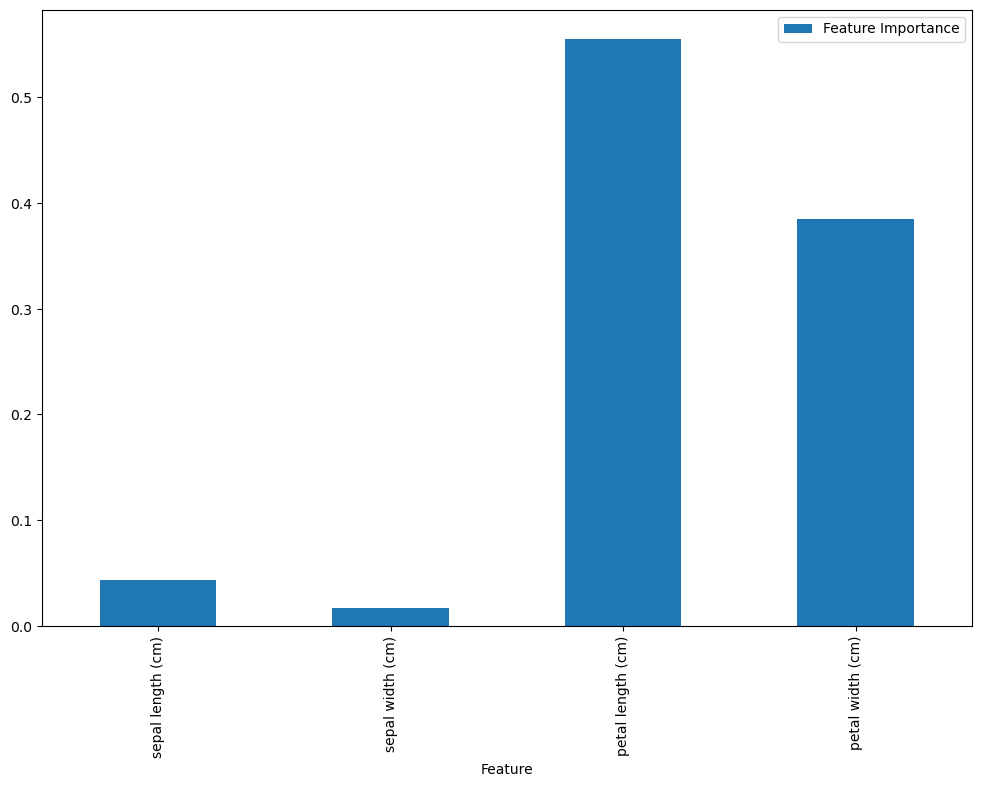

In [30]:
fig, ax = plt.subplots(figsize=(12,8))
feature_importances.plot(x='Feature',y='Feature Importance',kind='bar',ax=ax)
plt.show()

This view gives us an easily understood and interpretable output for our analysis. We can see the model identifies the setosa easily (as expected) and then looks for different ways to split up the versicolor and virginica. You can see how big each data divide is at each stage as well as what the majority label is. 

Of course, there are other ways we can optimize our model. When initializing the model, we can change the following parameter:

<ul>
    <li> <b>criterion</b>- This selects the way the model makes its decision, by default it is gini, but you can change it to <i>entropy</i> to select the information gain method.</li>
    <li> <b>splitter</b>- By default this is set to 'best' so the model chooses the optimal split for the method chosesn in criterion. You can change it to <i>random</i> so it chooses the best random split.</li>
    <li> <b>max-depth</b>- This sets the maximum depth of the tree, by default it is set to none so the tree keeps splitting until it cannot go any further. This can lead to overfitting however, so you may want to set a limit to how many times it can divide.</li>
</ul>

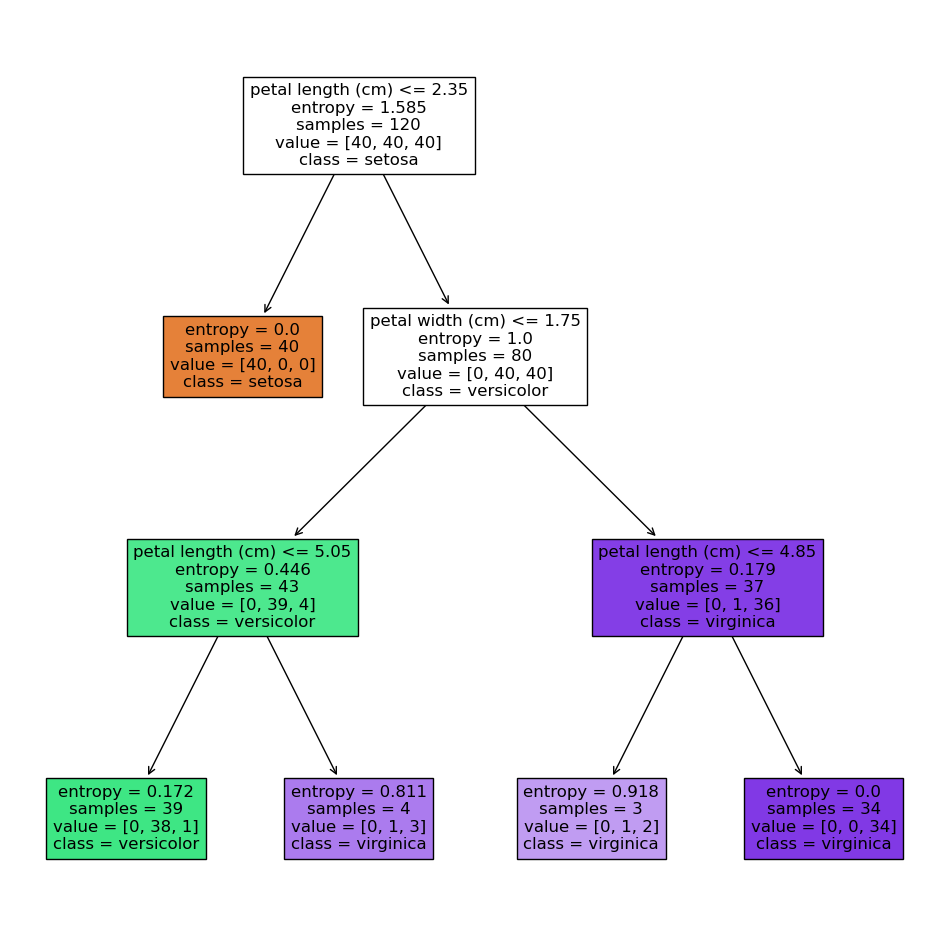

In [31]:
dec_tree=DecisionTreeClassifier(criterion='entropy',max_depth=3)
dec_tree.fit(X_train,y_train)

fig, ax= plt.subplots(figsize=(12,12))
plot_tree(dec_tree,feature_names=X.columns,class_names=iris_df.species_name.unique(),filled=True,ax=ax)
plt.show()

In [32]:
print('Train score: '+str(dec_tree.score(X_train,y_train)))
print('Test score: '+str(dec_tree.score(X_test,y_test)))
print('Baseline: '+str(iris_df.species_name.value_counts(normalize=True).max()))

Train score: 0.975
Test score: 0.9666666666666667
Baseline: 0.3333333333333333


## Pros and cons

When building predictive models you should always be willing to try multiple types to see which is best. For example, if it is a classification problem try both Logistic Regression and a Decision Tree and see which is the better fit to your problem.

More formally however, the <b>advantages</b> that Decision Trees have over models like Logistic Regression are:

<ul>
    <li> They can be applied to both regression and classification problems</li>
    <li> They are easy to interpret and understand </li>
    <li> They do not assume underlying distributions in the data and can be applied to non-normal and non-linear datasets</li>
    <li> They handle easily both numerical and categorical data types </li>
    <li> They are not influenced by outliers</li>
    <li> They can be used to easily identify feature importance as part of EDA</li>
</ul>

As for the <b>disadvantages</b>:

<ul>
    <li> They tend to overfit the data, optimizing the model parameters can help with this</li>
    <li> They are sensitive to changes in the underlying data, a small change can lead to huge differences in model performance</li>
</ul>

## Practice

The research wing of a car company has noticed that in recent years that the rate of attrition is around 15%, whether that be the employee leaving voluntarily, or having their employment terminated. The company is concerned about this and would like you to investigate what factors they should focus on in order to reduce attrition.

Choose five factors within the dataset you think relevant to build a decision tree model that predicts if someone will leave their role or not. Investigate the output to check which features are the most important in deciding attrition. 

In [33]:
hr_data=pd.read_csv('attrition.csv')
hr_data.head()

,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Age,Department,DistanceFromHome,JobLevel,JobRole,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,JobInvolvement,PerformanceRating,LeftRole
0,3.0,4.0,2.0,51,Sales,6,1,Healthcare Representative,131160,1.0,11,8,1.0,6,1,0,3,3,No
1,3.0,2.0,4.0,31,Research & Development,10,1,Research Scientist,41890,0.0,23,8,6.0,3,5,1,2,4,Yes
2,2.0,2.0,1.0,32,Research & Development,17,4,Sales Executive,193280,1.0,15,8,5.0,2,5,0,3,3,No
3,4.0,4.0,3.0,38,Research & Development,2,3,Human Resources,83210,3.0,11,8,13.0,5,8,7,2,3,No
4,4.0,1.0,3.0,32,Research & Development,10,1,Sales Executive,23420,4.0,12,8,9.0,2,6,0,3,3,No


## Regression

Decision Trees can also be used for regression type problems as well. With Linear Regression, the model aimed to find the optimal 'line' that best described the data. Decision trees follow the same as before, asking questions of the data to divide it into subgroups from which it can assign a value. This method is useful for when the data is abnormally distributed or when wanting to explore the data, it does run into significant problems quite quickly. Decision trees are sensitive to when the underlying data changes, in other words, if you are trying to update a model you may find it changes quite drastically. Decision trees also hve a tendency to overfit the data.

Let's do an example of a Decision Tree for regression using the College data from module 8:

In [40]:
from sklearn.tree import DecisionTreeRegressor

In [41]:
college=pd.read_csv('College_Data.csv')
college.head()

,College,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [42]:
X=college[['Top10perc','Expend']] #Let's build the model using the same features as before
y=college['Grad.Rate']

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.8)

In [43]:
reg=DecisionTreeRegressor(max_depth=3) #setting max_depth to 3 to try and avoid overfitting
reg.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=3)

In [44]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

print('Train score: ' +str(reg.score(X_train,y_train)))
print('Test score: ' + str(reg.score(X_test,y_test)))

preds=reg.predict(X)
print('RMSE: ' + str(np.sqrt(mean_squared_error(preds,y))))
print('MAE: ' + str(mean_absolute_error(preds,y)))

Train score: 0.29110993625313497
Test score: 0.26321937611847734
RMSE: 14.511635540113092
MAE: 11.287288141160065


Like before, we don't get a great model (although we can play with the parameters to fine tune the model- change criterion, max_depth, even the features, etc). Like with the classification model, we can look at the tree as well as explore the feature importance:

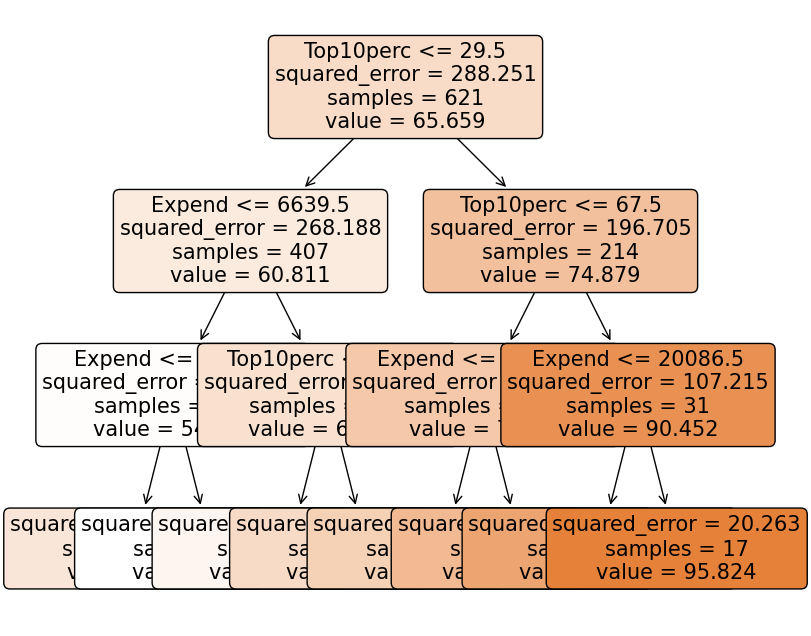

In [45]:
fig, ax= plt.subplots(figsize=(8,8))
plot_tree(reg,feature_names=X.columns,filled=True,ax=ax,fontsize=15,rounded=True)
plt.show()

In [46]:
feature_importances=pd.DataFrame({'Feature':X.columns,'Feature Importance':reg.feature_importances_})
display(feature_importances)

,Feature,Feature Importance
0,Top10perc,0.767331
1,Expend,0.232669


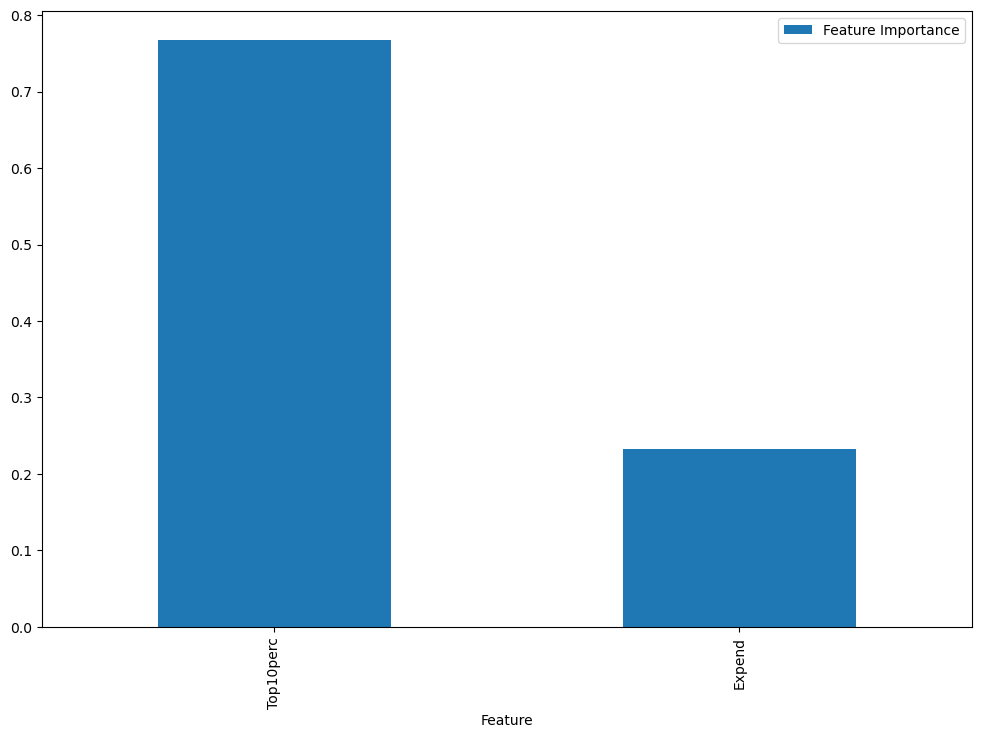

In [47]:
fig, ax = plt.subplots(figsize=(12,8))
feature_importances.plot(x='Feature',y='Feature Importance',kind='bar',ax=ax)
plt.show()

Using a decision tree for regression can sometimes be useful, so if you are doing a regression problem, it is worth trying it out to see if it is an improvement over Linear Regression.

## Random Forest

What is better than one tree? How about a whole forest!

A problem with decision trees is the way they choose to make decisions, they are inconsistent! The method they use involves trying to find the best split, but what it decides one time may not be the same the next. For example, consider the example earlier for splitting up the numbers from 1 to 6:

<img src='onetosixe1.PNG' alt='a division of one to six'>

You could also do it this way:

<img src='onetosixe2.PNG' alt='a division of one to six'>

Or even this way:

<img src='onetosixe3.PNG' alt='a division of one to six'>

The point is, there are potentially hundreds of ways you can divide up data using a decision tree. The issue this gives us is that the output given by a Decision Tree we have built may not be the same if we repeat the process (even using the exact same data). In a classification problem, two trees with the same information could classify a piece of data differently based on how they choose to split it up. If you were to go back to the models made earlier, and rerun them, it is highly likely they will perform differently because of this issue.

If decision trees can be so unstable, how can we trust them?

The answer is through the power of team work- we make a whole forest!

The principle is simple, we build a number of Decision Trees simultaneously and then compare their output. For example, imagine we are trying to classify a data point as pass/fail. We build several trees and then for each data point we ask what label they assigned. If the majority of trees say pass, then we label that piece of data as pass- simple! 

This method is known as bagging. Essentially, the theory is that a committee of decision makers will be more effective than any one on their own, in other words, many hands make light work. 

Setting up such a model follows the same syntax, but there is one parameter we need to pass- how many 'estimators' (comittee members) we want to assign.

In [48]:
X=iris_df.drop(['species','species_name'],axis=1)
y=iris_df.species_name
X_train, X_test, y_train, y_test = train_test_split(X,y, stratify=y, train_size=0.8)

In [49]:
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier(n_estimators=1000) #1000 decision makers is often a good number to go for
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=1000)

In [50]:
print('Train score: '+str(rf.score(X_train,y_train)))
print('Test score: '+str(rf.score(X_test,y_test)))
print('Baseline: '+str(iris_df.species_name.value_counts(normalize=True).max()))

Train score: 1.0
Test score: 1.0
Baseline: 0.3333333333333333


Like before, the scores are unrealistically high due to how nice the data is for modelling. The difference from before, however, is that this model has made 1000 decision trees and combining all their outputs to assign the labels. 

As there are 1000 models, we cannot analyse the output in the same way- but we can look at them individually. For example, if we wanted to check how the 148th model assigned the data, we can look at it specifically:

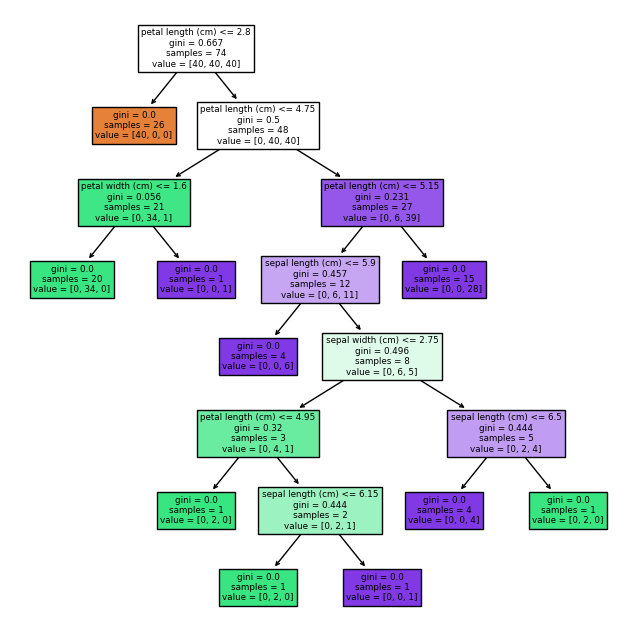

In [51]:
fig, ax= plt.subplots(figsize=(8,8))
plot_tree(rf.estimators_[148],feature_names=X.columns,filled=True,ax=ax)
plt.show()

We can see how the combined consensus of the models valued each feature when making their decisions:

In [52]:
feature_importances=pd.DataFrame({'Feature':X.columns,
                                  'Feature Importance':rf.feature_importances_})
display(feature_importances)

,Feature,Feature Importance
0,sepal length (cm),0.110520
1,sepal width (cm),0.023115
2,petal length (cm),0.434588
3,petal width (cm),0.431777


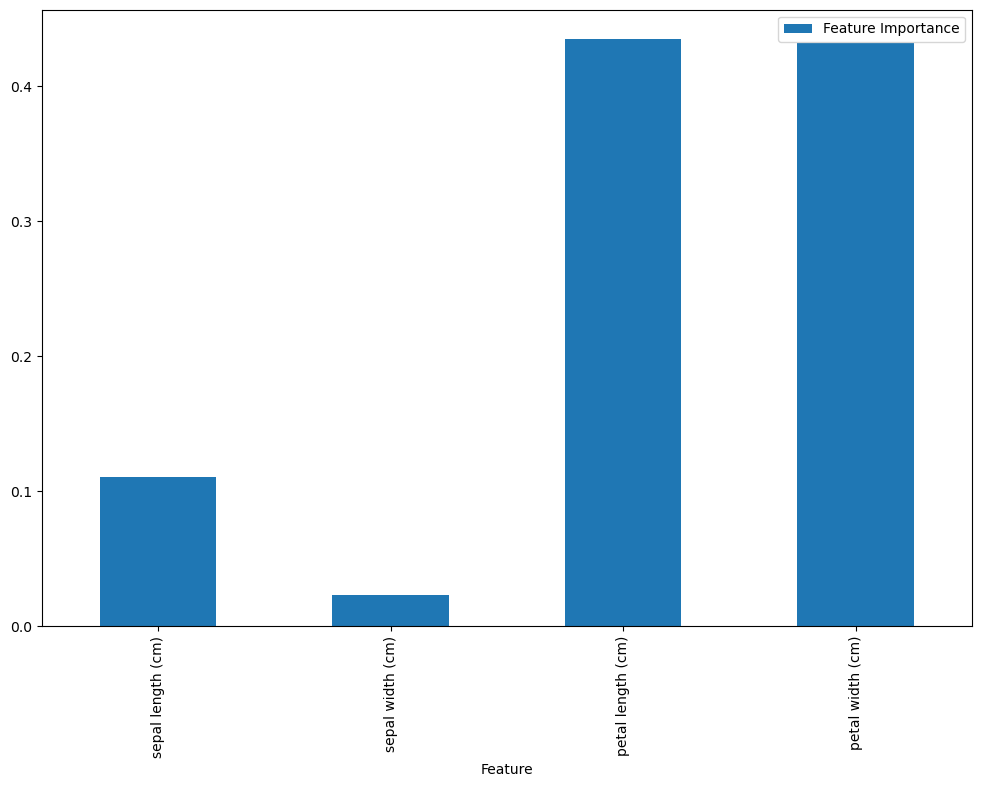

In [53]:
fig, ax = plt.subplots(figsize=(12,8))
feature_importances.plot(x='Feature',y='Feature Importance',kind='bar',ax=ax)
plt.show()

With sensitive models like decision trees, bagging methods like Random Forest can mitigate the issue. Instead of having one model which can inconsistently make decisions, have many and then combine their output.

Other bagging methods exist, as well as some similar ones called boosting. We won't be covering them here, but they are worth looking into.

## Practice

Go back to the HR data, and build a new model using Random Forest. Investigate the output, are the features being used in the same way?

## [Stretch] GridSearch

In all the models we have seen today there have been several parameters we can play with (criterion, max_depth, etc). It can be tedious to try them all manually, so instead we can use GridSearch. With this approach we pass in all the parameters we want to test and it returns the best model. 

Let's do an example with Random Forest and our Iris data:

In [60]:
X=iris_df.drop(['species','species_name'],axis=1)
y=iris_df.species_name
X_train, X_test, y_train, y_test = train_test_split(X,y, stratify=y, train_size=0.8)

In [61]:
from sklearn.model_selection import GridSearchCV

# Create a dictionary of all the parameters we want to test, with the options placed in a list
params={'criterion':['gini','entropy'],
        'max_depth':[3,5,10,None],
        'n_estimators':[100,1000]}

# This will create 16 models to test (every possible permutation)

estimator=RandomForestClassifier() # Model type we want to test

grid=GridSearchCV(estimator,params,cv=5)
grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 10, None],
                         'n_estimators': [100, 1000]})

Keep in mind that for every parameter you are testing, that is another model that needs to be built. The total number of models is the product of how many options you put in the dictionary (in this case 2x4x2 = 16]. Depending on the size of data and number of tests, this function can take a long time to run.

Once the models have finished, we can see which one performed the best:

In [62]:
grid.best_estimator_

RandomForestClassifier(max_depth=5, n_estimators=1000)

And what the best parameters were:

In [63]:
grid.best_params_

{'criterion': 'gini', 'max_depth': 5, 'n_estimators': 1000}

And what score the best model produced:

In [64]:
grid.best_score_

0.9666666666666666

If we want to use the best model for the next steps of our analysis, we just save it as a variable:

In [65]:
best=grid.best_estimator_

If you are wanting to fine tune a model and find that it has a lot of parameters that can be changed, GridSearch is a simple way to test all the different options out in one block of code.

## Practice

Try using GridSearch with your HR data from earlier to see if you can find the best model.

## [Stretch] Save your model

So, you have built a model, fine-tuned it and decided on which one is best- what do you do next? 

It's likely you'll want to save your model so you can use it in the next stage of your analysis. You could just rerun it every time you want to use it, but as seen earlier, this can lead to discrepencies (particularly if the underlying data has changed). It is a good idea then to export your model as is for later use, this is where the joblibe library comes in.

To save our model we use the `.dump()` function and then to load it later we use `.load()`:

In [331]:
# Save the random forest classifier for the iris dataset

import joblib

joblib.dump(rf,'iris_classifier') # the inputs are the object you want to save, and what to call it

['iris_classifier']

In [332]:
# To load a model you have previously saved (or have received from someone else)

joblib.load('iris_classifier')

RandomForestClassifier(n_estimators=1000)